In [ ]:
#Food Delivery Time Prediction using LinearRegression,DecisionTreeRegressor,RandomForestRegressor,GradientBoostingRegressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error,accuracy_score,classification_report,confusion_matrix,mean_squared_log_error

In [ ]:
df= pd.read_csv("/content/deliverytime.txt" , nrows=10000)
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  object 
 1   Delivery_person_ID           10000 non-null  object 
 2   Delivery_person_Age          10000 non-null  int64  
 3   Delivery_person_Ratings      10000 non-null  float64
 4   Restaurant_latitude          10000 non-null  float64
 5   Restaurant_longitude         10000 non-null  float64
 6   Delivery_location_latitude   10000 non-null  float64
 7   Delivery_location_longitude  10000 non-null  float64
 8   Type_of_order                10000 non-null  object 
 9   Type_of_vehicle              10000 non-null  object 
 10  Time_taken(min)              10000 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 859.5+ KB


In [ ]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,29.522000,4.629370,16.893418,70.177749,17.412655,70.880072,26.420600
std,5.700348,0.322941,8.330948,23.203352,7.336846,21.174585,9.384343
min,15.000000,1.000000,-30.902872,-88.352885,0.010000,0.010000,10.000000
25%,25.000000,4.500000,12.913041,73.170937,12.983959,73.753278,19.000000
50%,29.000000,4.700000,18.546258,75.902847,18.626216,76.022574,26.000000
75%,34.000000,4.800000,22.727021,78.047717,22.785089,78.128092,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [ ]:
x=df.drop(['Time_taken(min)'],axis=1)
y=df['Time_taken(min)']
print(x.shape)
print(y.shape)

(10000, 10)
(10000,)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(8000, 10)
(2000, 10)


In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
x_train_encoded = encoder.fit_transform(x_train.select_dtypes(include=['object']))
x_train_numeric = x_train.drop(columns=x_train.select_dtypes(include=['object']).columns)
x_train_final = np.hstack((x_train_numeric, x_train_encoded))


In [ ]:
lr=LinearRegression()
lr.fit(x_train_final,y_train)

LinearRegression()

In [ ]:
x_test_encoded = encoder.transform(x_test.select_dtypes(include=['object']))
x_test_numeric = x_test.drop(columns=x_test.select_dtypes(include=['object']).columns)
x_test_final = np.hstack((x_test_numeric, x_test_encoded))

In [ ]:
y_pred = lr.predict(x_test_final)
print(y_pred)

[20.94867721 24.54656712 25.15816154 ... 27.78890545 28.9947969
 32.3177075 ]


In [ ]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

6.943521073877507


In [ ]:
print(r2_score(y_test,y_pred))

0.1041705361821561


In [ ]:
print(mean_squared_error(y_test,y_pred))

76.44015706843784


In [ ]:
print(median_absolute_error(y_test,y_pred))

5.835568777545321


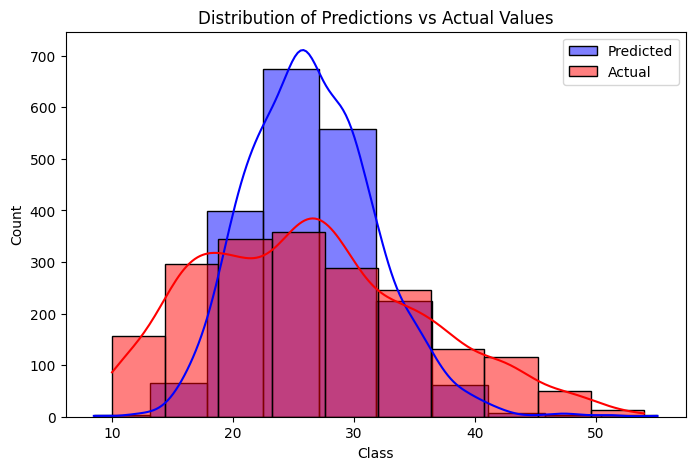

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

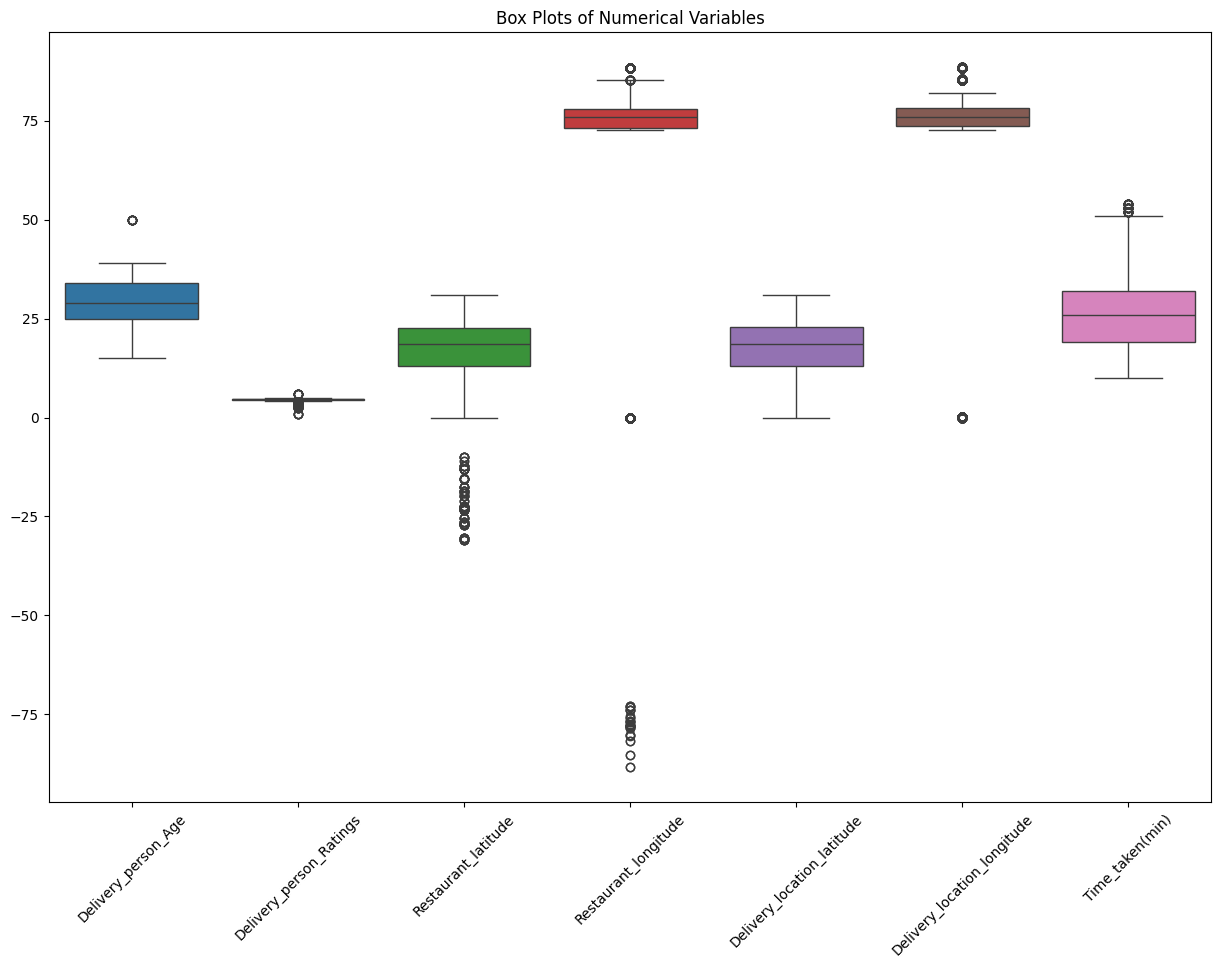

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()
model.fit(x_train_final, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(x_test_final)
print(y_pred)

[22. 17. 35. ... 19. 31. 19.]


In [ ]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

6.077310000000001


In [ ]:
mse= mean_squared_error(y_test,y_pred)
print(mse)

60.10394


In [ ]:
print(r2_score(y_test,y_pred))

0.2956204904794524


In [ ]:
print(median_absolute_error(y_test,y_pred))

5.029999999999999


In [ ]:
root_mean_squared_error = np.sqrt(mse)
print(root_mean_squared_error)

7.752673087393792


In [ ]:
root_mean_squared_log_error = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(root_mean_squared_log_error)

0.2975162686166307


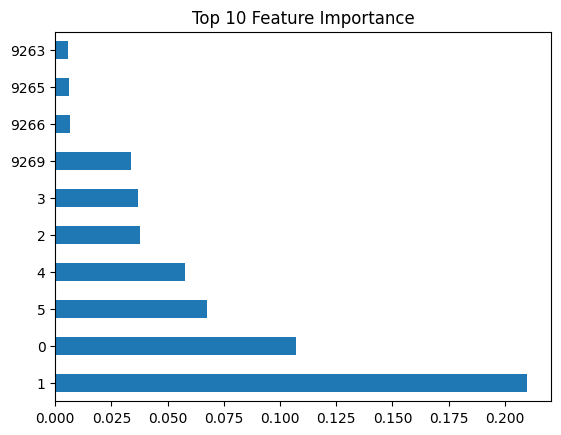

In [ ]:
feature_importance = pd.Series(model.feature_importances_)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Feature Importance")
plt.show()

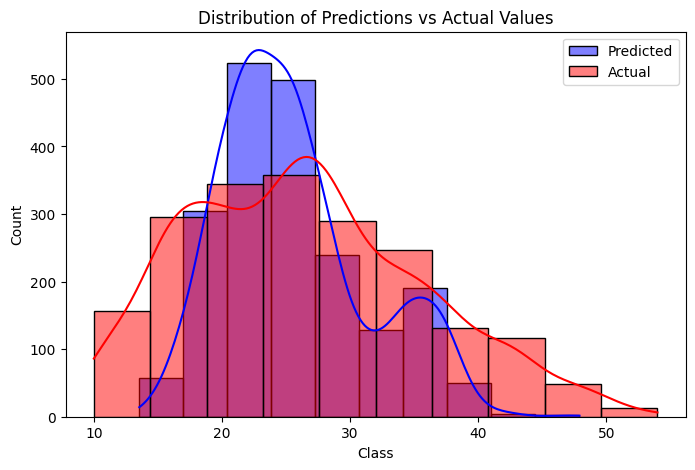

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

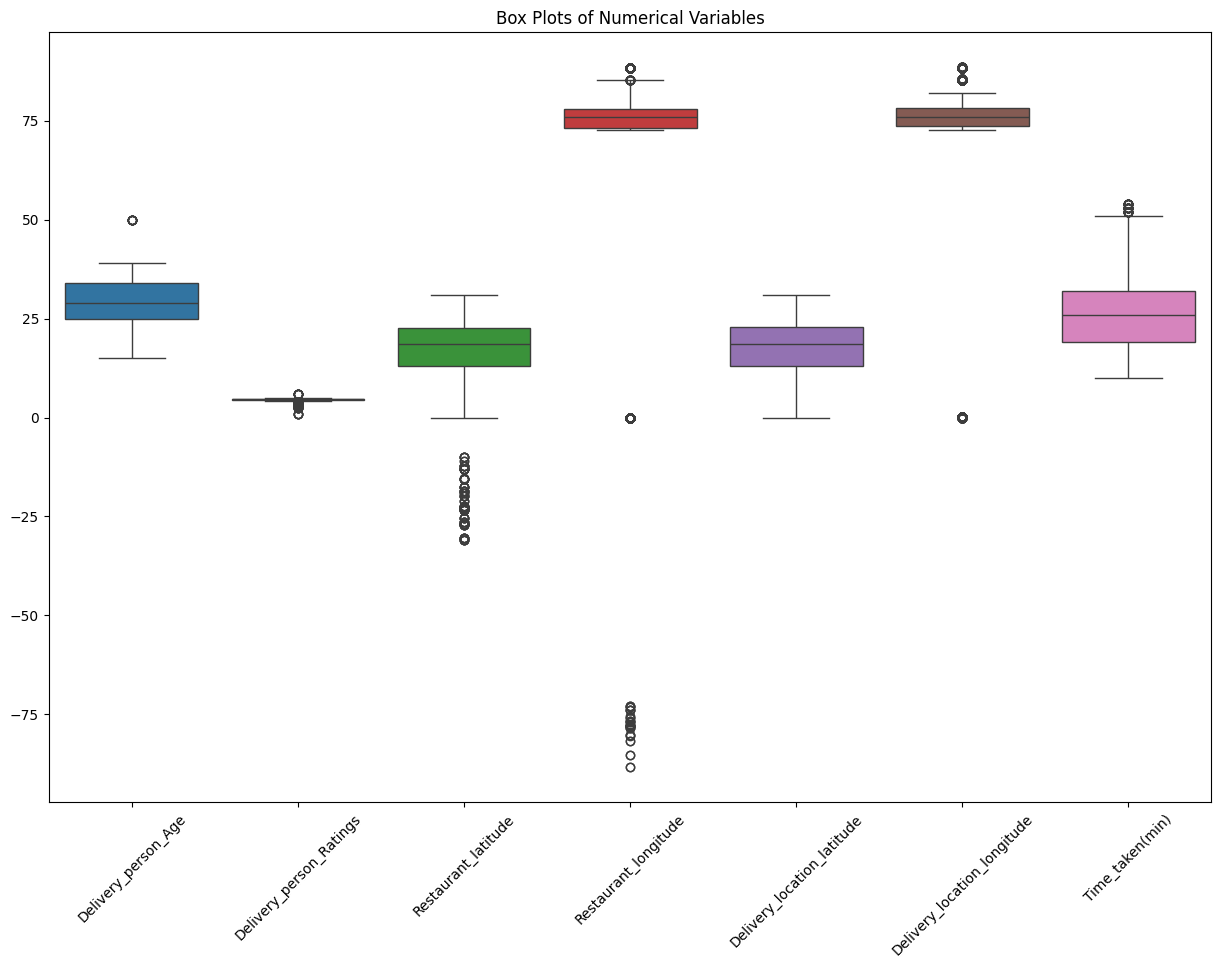

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#RandomForestRegressor

In [ ]:
rf=RandomForestRegressor()
rf.fit(x_train_final, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(x_test_final)
print(y_pred)

[25.61 19.14 35.97 ... 24.23 31.3  22.81]


In [ ]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

6.07479


In [ ]:
mse= mean_squared_error(y_test,y_pred)
print(mse)

60.18610150000001


In [ ]:
print(r2_score(y_test,y_pred))

0.2946576105572465


In [ ]:
print(median_absolute_error(y_test,y_pred))

4.945


In [ ]:
root_mean_squared_error = np.sqrt(mse)
print(root_mean_squared_error)

7.757970192002545


In [ ]:
root_mean_squared_log_error = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(root_mean_squared_log_error)

0.29801277214794664


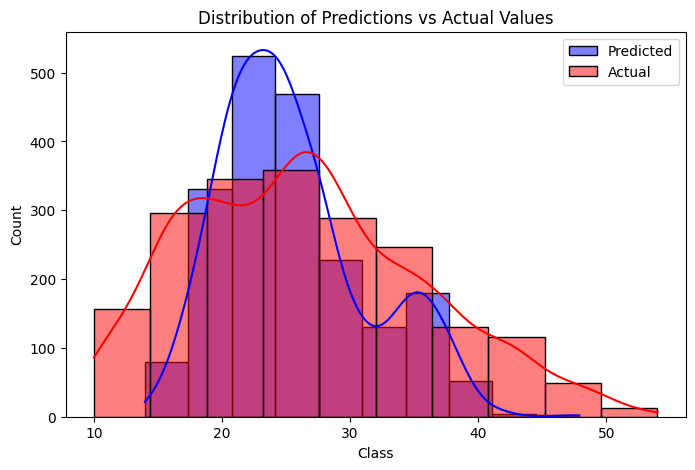

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

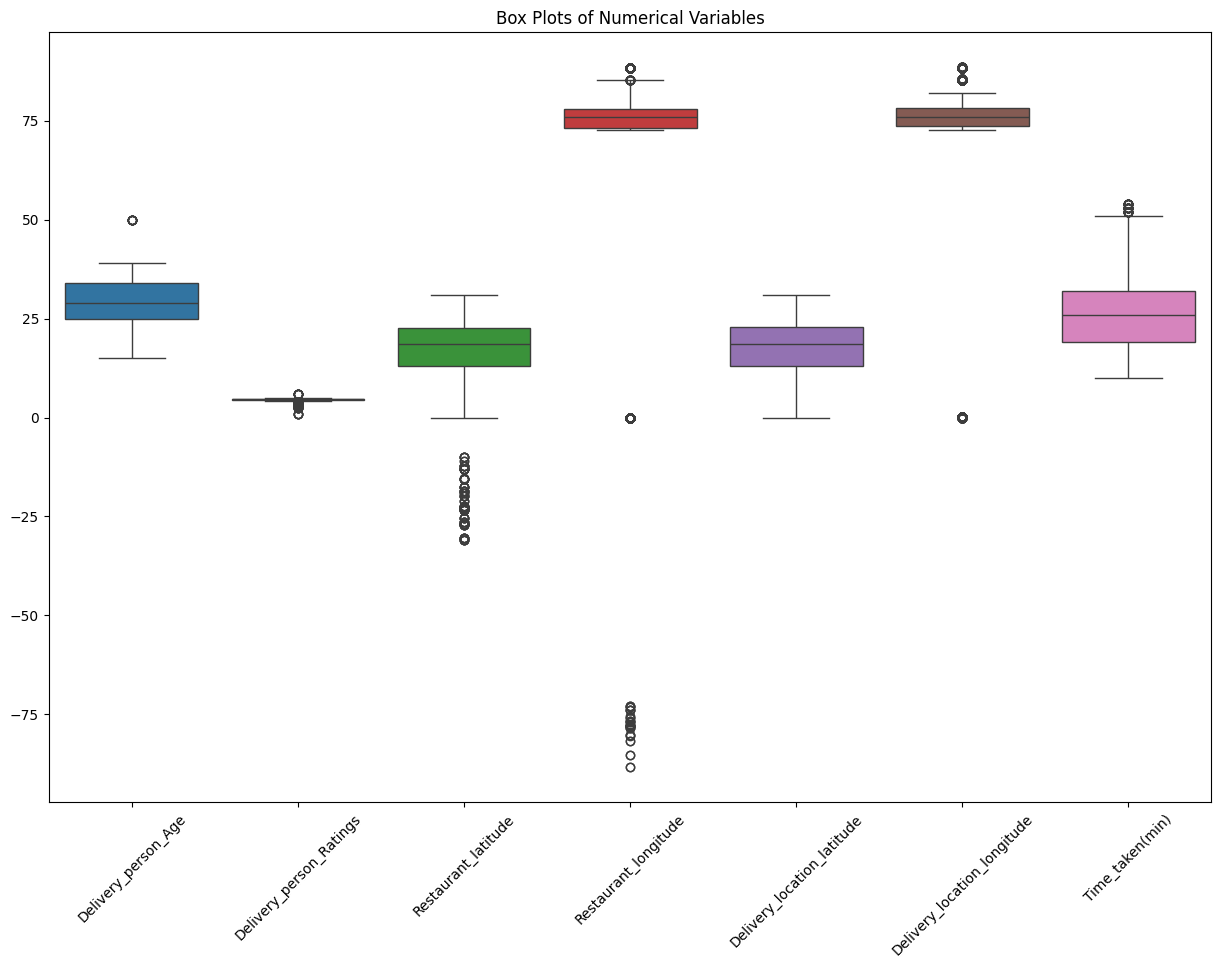

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#GradientBoostingRegressor

In [ ]:
gb=GradientBoostingRegressor()
gb.fit(x_train_final, y_train)

GradientBoostingRegressor()

In [ ]:
y_pred = gb.predict(x_test_final)
print(y_pred)

[22.95451218 22.95451218 32.4485922  ... 23.98082373 33.23926334
 25.70980355]


In [ ]:
mae=mean_absolute_error(y_test,y_pred)
print(mae)

6.0795016875957835


In [ ]:
mse= mean_squared_error(y_test,y_pred)
print(mse)

59.2384324832726


In [ ]:
print(r2_score(y_test,y_pred))

0.3057636817597378


In [ ]:
print(median_absolute_error(y_test,y_pred))

4.954512176069553


In [ ]:
root_mean_squared_error = np.sqrt(mse)
print(root_mean_squared_error)

7.696650731537231


In [ ]:
root_mean_squared_log_error = np.sqrt(mean_squared_log_error(y_test, y_pred))
print(root_mean_squared_log_error)

0.3005593372796961


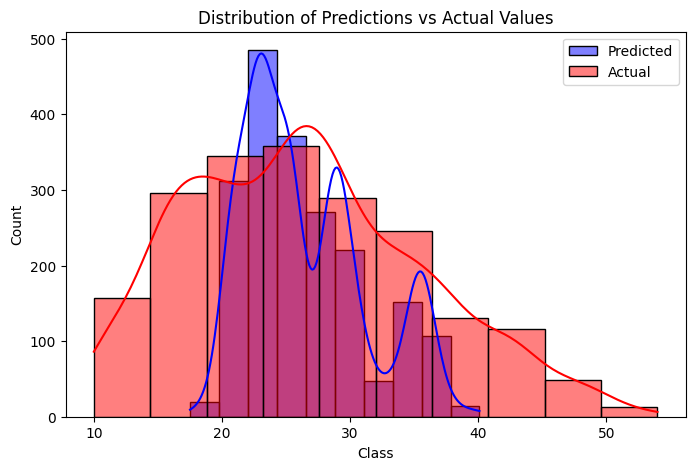

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(y_pred, color='blue', label="Predicted", alpha=0.5, bins=10, kde=True)
sns.histplot(y_test, color='red', label="Actual", alpha=0.5, bins=10, kde=True)

plt.legend()
plt.title("Distribution of Predictions vs Actual Values")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

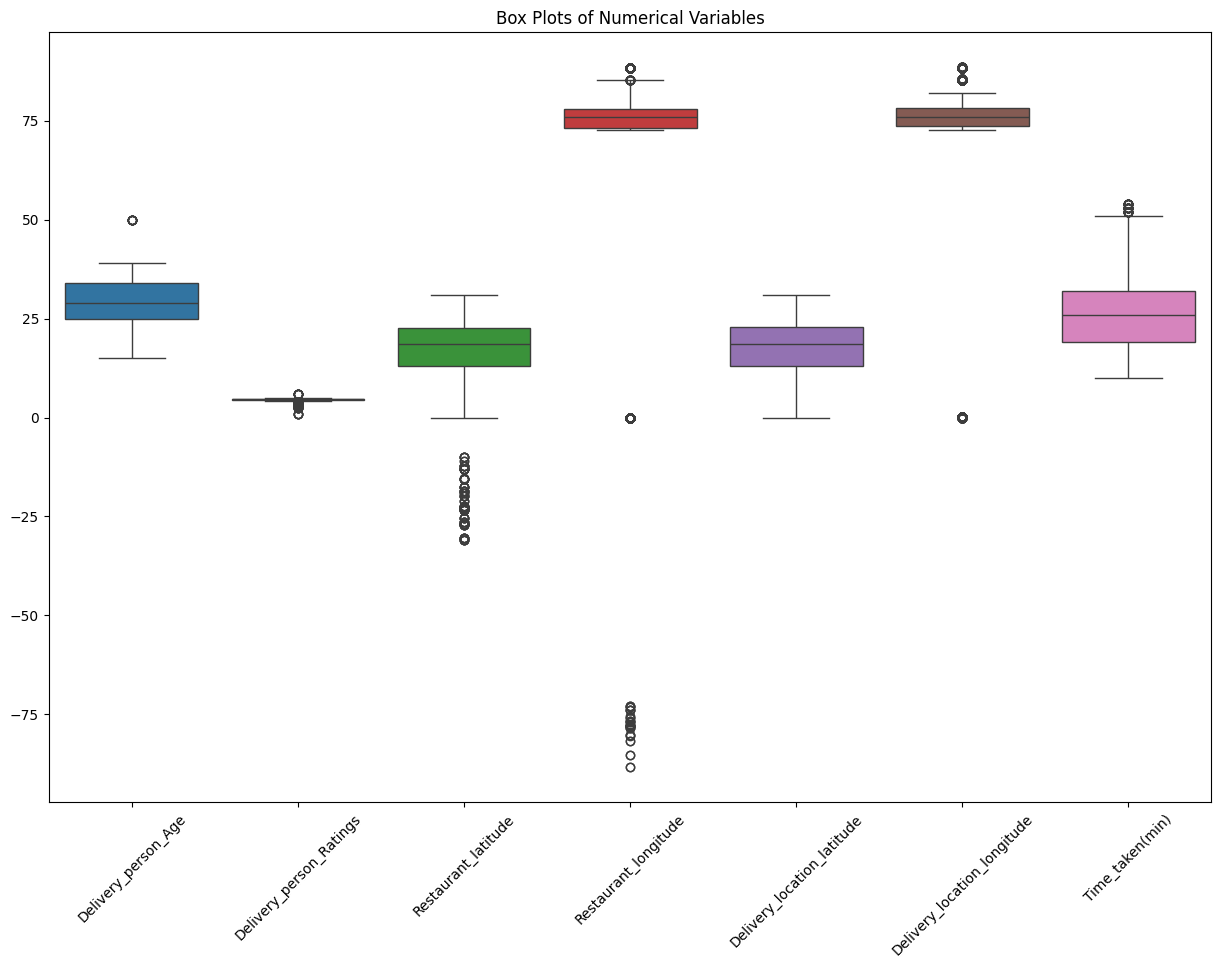

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title("Box Plots of Numerical Variables")
plt.xticks(rotation=45)
plt.show()